* [Titanic 100%](https://www.kaggle.com/blurredmachine/titanic-survival-a-complete-guide-for-beginners)
* [MLCource](https://mlcourse.ai/)

In [1]:
import os
import warnings
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

warnings.filterwarnings("ignore")


df = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')

In [2]:
# describe(include = ['O'])* will show the descriptive statistics of object data types.
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Svend Lauritz",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


<AxesSubplot:xlabel='Age', ylabel='Density'>

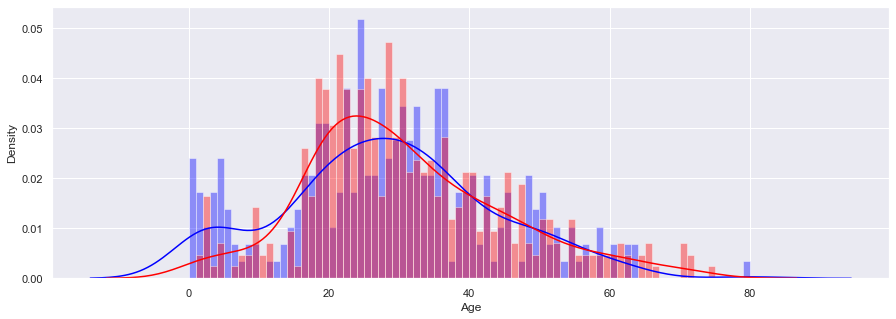

In [4]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

print('Survived: %i (%.1f%%)' %
      (len(survived), float(len(survived))/len(df)*100))
print('Not Survived: %i (%.1f%%)' %
      (len(not_survived), float(len(not_survived))/len(df)*100))
print('Total: %i' % len(df))

# Гистограмма сравнения двух типов откликов по одному предиктору, с ликвидацией NaN
plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.distplot(survived['Age'].dropna().values,
             bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(not_survived['Age'].dropna().values, bins=range(
    0, 81, 1), kde=True, color='red', axlabel='Age')

In [5]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
# Вектор показывает группировку внутри колоники по стороннему параметру
pclass_survived = df.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

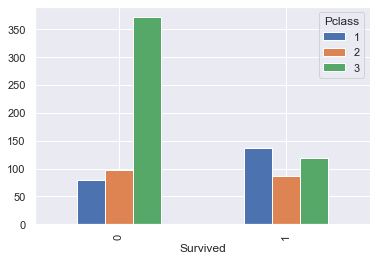

In [7]:
# Метод анстак позволяет разделить отклик на группы по значению предикторов
pclass_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [8]:
# Фрейм группирует предикторы по значению отклика
pclass_survived_average = df[['Pclass', 'Survived']].groupby(['Pclass'],
                                                             as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

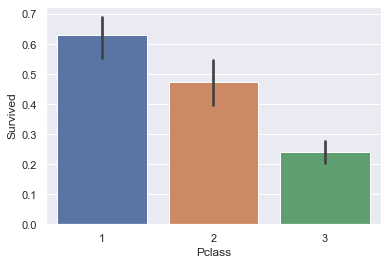

In [9]:
# График группировки по двум параметрам
sns.barplot(x='Pclass', y='Survived', data=df)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

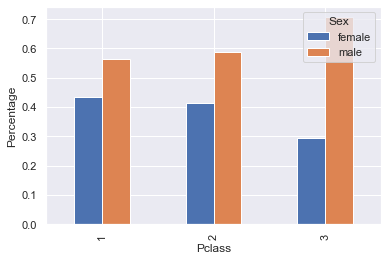

In [10]:
# Создание фрейма с кроссраспределением групп по двум предикторам и их итоговому отклику
tab=pd.crosstab(df['Pclass'], df['Sex'])
print(tab)

# График, который через суммирование всех значений в колонке и превращение в дробь, показывает процентное распределение в ней
tab.div(tab.sum(1). astype(float), axis=0).plot(kind='bar', stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

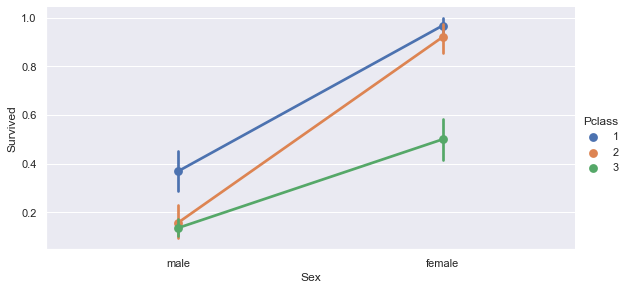

In [11]:
# График сравнения откликов в группах, в зависимости от предиктора (hue) 
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=df)

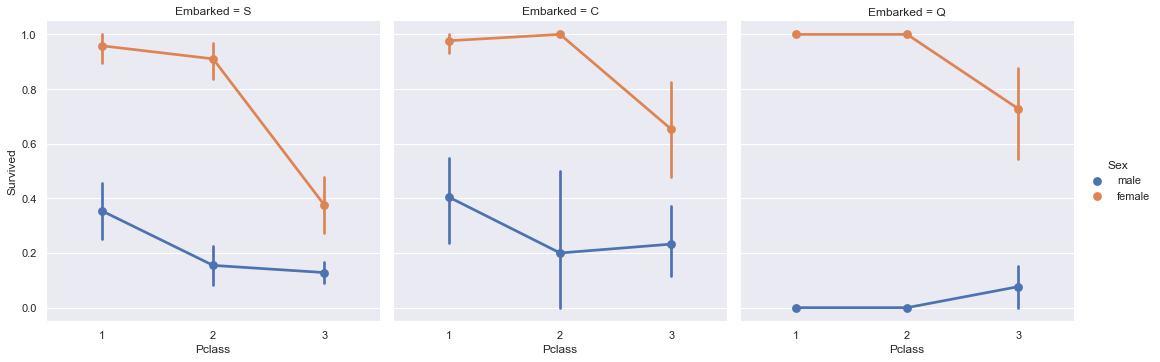

In [12]:
# Зависимость и распределение откликов от трех предикторов. Для этого строятся параллельные графики по два в каждом
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df);

<AxesSubplot:xlabel='Sex', ylabel='Age'>

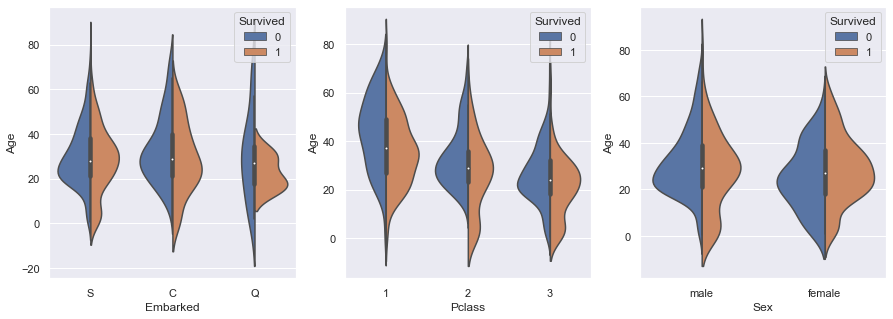

In [13]:
# Относительное сравнение. Один предиктор постоянен, отклик отправлен в (hue), дополнительные предикторы меняются
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked', y='Age', hue='Survived',
               data=df, split=True, ax=ax1)
sns.violinplot(x='Pclass', y='Age', hue='Survived',
               data=df, split=True, ax=ax2)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, ax=ax3)

<AxesSubplot:xlabel='Male Age', ylabel='Density'>

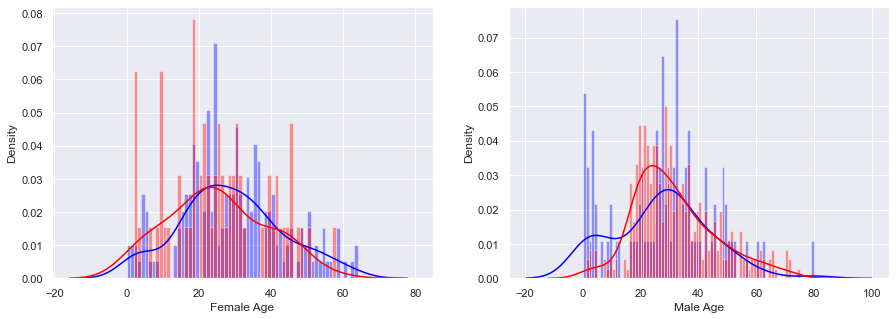

In [14]:
# Построение графика параллельного сравнения двух откликов для одного предиктора для двух групп

male_survived = df[(df['Survived'] == 1) & (df['Sex'] == 'male')]
female_survived = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]
male_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == 'male')]
female_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == 'female')]

plt.figure(figsize=[15, 5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values,
             bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(
    0, 81, 1), kde=True, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values,
             bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(
    0, 81, 1), kde=True, color='red', axlabel='Male Age')

<AxesSubplot:>

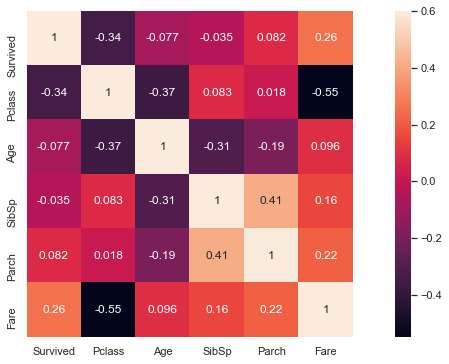

In [15]:
# Хитмап корреляции для числовых колонок
plt.figure(figsize=(15, 6))
sns.heatmap(df.drop('PassengerId', axis=1).corr(),
            vmax=0.6, square=True, annot=True)

In [16]:
trd = [df, tsd]

In [17]:
for dataset in trd:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.') #Извлекает все буквы перед избранным знаком(.)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
# Объединяем группы, сливая единичные параметры в более общие
for d in trd:
    d['Title'] = d['Title'].replace(
        ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Other')
    d['Title'] = d['Title'].replace('Mlle', 'Miss')
    d['Title'] = d['Title'].replace('Ms', 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')

In [21]:
title_mapping = {'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Other': 5}
for d in trd:
    d['Title'] = d['Title'].map(title_mapping)
    d['Title'] = d['Title'].fillna(0)

In [22]:
for d in trd:
    d['Sex'] = d['Sex'].map({'female':0, 'male':1}).astype(int)

In [23]:
for d in trd:
    d['Embarked'] = d['Embarked'].fillna('S')

In [24]:
# Все пустые строки заполняем случайным числом из охвата +-сигма
for d in trd:
    age_avg = d['Age'].mean()
    age_std = d['Age'].std()
    age_null_count = d['Age'].isnull().sum()

    age_null_random_list = np.random.randint(
        age_avg - age_std, age_avg + age_std, size=age_null_count)
    d['Age'][np.isnan(d['Age'])] = age_null_random_list
    d['Age'] = d['Age'].astype(int)

In [25]:
# Разделяем данные на равные блоки методом CUT
df['AgeBand'] = pd.cut(df['Age'], 5) #Указываем число нужных блоков
print(df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.504202
1   (16.0, 32.0]  0.351770
2   (32.0, 48.0]  0.383333
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [26]:
for d in trd:
    d.loc[ d['Age'] <= 16, 'Age'] = 0
    d.loc[(d['Age'] > 16) & (d['Age'] <= 32), 'Age'] = 1
    d.loc[(d['Age'] > 32) & (d['Age'] <= 48), 'Age'] = 2
    d.loc[(d['Age'] > 48) & (d['Age'] <= 64), 'Age'] = 3
    d.loc[ d['Age'] > 64, 'Age'] = 4

In [27]:
for d in trd:
    d['Embarked'] = d['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [28]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.793651
2,3,0.702703
3,4,0.575000
4,5,0.347826


<AxesSubplot:xlabel='Title', ylabel='Survived'>

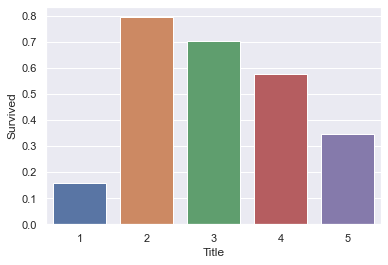

In [29]:
sns.barplot(x='Title', y='Survived', ci=None, data=df) # ci убирает доп.черты на графике

In [30]:
df['Title'] = df['Title'].map(
    {'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Other': 5})